    # Default Perturbation network analysis notebook
    This notebook was automatically generated using freenrgworkflows
    Author: Antonia Mey
    Email: antonia.mey@ed.ac.uk

In [74]:
    %pylab inline
    import networkanalysis.networkanalysis as n_graph
    import networkanalysis.plotting as n_plot
    import networkanalysis.experiments as n_ex
    import networkanalysis.stats as n_stats
    import networkanalysis
    
    import pandas as pd 
    networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


'1.1.0'

In [64]:
    # Creating and populating the perturbation network
    pG = n_graph.PerturbationGraph()
    # Change the path below to the csv file containing the individual perturbations
    pG.populate_pert_graph('../outputs/summary.csv')
    # Uncomment below if you have run multiple runs for some perturbations and add file path
    #pG.add_data_to_graph('/path/to/additional/runs.csv')
    target_compound = pG.compoundList[0] #change this to your target compound
    pG.compute_weighted_avg_paths(target_compound)
    pG.format_free_energies(merge_BM=True,intermed_ID='INT')
    computed_relative_DDGs = pG.freeEnergyInKcal
    print ("Free energies computed from the perturbation network are: ")
    print ("---------------------------------------- ")
    pG.write_free_energies(computed_relative_DDGs)

Free energies computed from the perturbation network are: 
---------------------------------------- 
#FREE ENERGIES ARE:
ROS1_0798  -0.000 +/- 0.000
ROS1_1537  0.387 +/- 0.280
ROS1_1872  -0.815 +/- 0.463
ROS1_2879  1.599 +/- 0.406
ROS1_3507  -0.411 +/- 0.247
ROS1_6674  0.836 +/- 0.329



    ### Experimental data
    It is useful to compare computed free energies to experimental data.
    The cells below will read in your experimental data. Just replace the path to you IC50 data in the
    `IC_50_file` variable 

In [65]:
    experiments = n_ex.ExperimentalData()
    IC_50_file = '../inputs/ic50_exp.dat'
    experiments.compute_DDG_from_IC50s(IC_50_file, reference=target_compound)
    experimental_DDGs = experiments.freeEnergiesInKcal
    print ("Free energies computed from IC50 data: ")
    print ("---------------------------------------- ")
    pG.write_free_energies(experimental_DDGs)

Free energies computed from IC50 data: 
---------------------------------------- 
#FREE ENERGIES ARE:
ROS1_0798  0.000 +/- 0.413
ROS1_1537  -0.575 +/- 0.413
ROS1_1872  0.595 +/- 0.413
ROS1_2879  0.150 +/- 0.413
ROS1_3507  0.726 +/- 0.413
ROS1_6674  -0.201 +/- 0.413



    For plotting it typically easier to work with the pandas library. This next bit of code reshapes the data into a dataframe format. 

In [67]:
freenrg_dict = {}

# construct dict with experimental freenrg and error.
for item in experimental_DDGs:
    ligand = list(item.keys())[0]
    freenrg = list(item.values())[0]
    error = list(item.values())[1]
    freenrg_dict[ligand] = [freenrg, error]

# append computed freenrg and error.
for item in computed_relative_DDGs:
    ligand = list(item.keys())[0]
    freenrg = list(item.values())[0]
    error = list(item.values())[1]
    freenrg_dict[ligand].append(freenrg)
    freenrg_dict[ligand].append(error)

freenrg_df = pd.DataFrame(freenrg_dict, index=["freenrg_exp", "err_exp", "freenrg_fep", "err_fep"]).transpose()
freenrg_df

,freenrg_exp,err_exp,freenrg_fep,err_fep
ROS1_0798,0.000000,0.413227,-0.000000,0.000000
ROS1_1537,-0.575344,0.413227,0.386720,0.280278
ROS1_1872,0.595284,0.413227,-0.814959,0.463437
ROS1_2879,0.149824,0.413227,1.598618,0.406235
ROS1_3507,0.726218,0.413227,-0.410893,0.246721
ROS1_6674,-0.200592,0.413227,0.835621,0.329418



    ### Typical plots
    Below a bar plot and scatter plot template for comparing experimental and computed free energy values

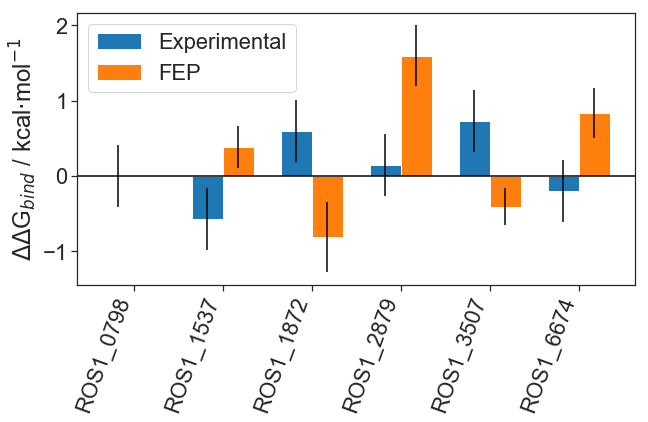

In [93]:
fig, ax = plt.subplots(figsize=(10,5))

# determine positions for X axis labels.
x_locs = np.arange(len(freenrg_df))

# set bar width
width = 0.35  

# plot both our experimental and FEP free energies using an offset on the x position.
exp_bars = ax.bar(x_locs - width/2, height=freenrg_df["freenrg_exp"], width=width, yerr=freenrg_df["err_exp"],
                label='Experimental')
exp_bars = ax.bar(x_locs + width/2, height=freenrg_df["freenrg_fep"], width=width, yerr=freenrg_df["err_fep"],
                label='FEP')

# format the plot further.
plt.axhline(color="black")
plt.ylabel("$\Delta\Delta$G$_{bind}$ / kcal$\cdot$mol$^{-1}$")
plt.xticks(x_locs, freenrg_df.index, rotation=70, ha="right")
plt.legend()
plt.show()

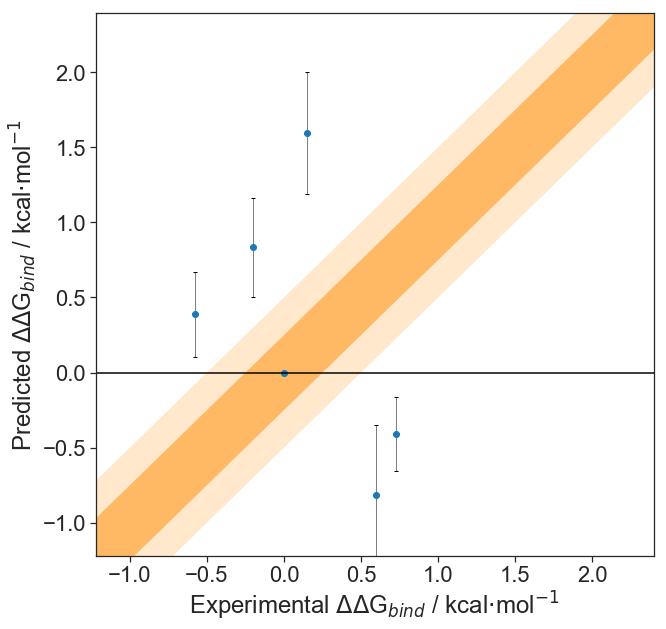

In [129]:
plt.figure(figsize=(10,10))

plt.scatter(freenrg_df["freenrg_exp"], freenrg_df["freenrg_fep"])

# plot 1/2 kcal bounds:
plt.fill_between(
				x=[-15, 15], 
				y2=[-14.75,15.25],
				y1=[-15.25, 14.75],
				lw=0, 
				zorder=-10,
				alpha=0.5,
				color="darkorange")
# upper bound:
plt.fill_between(
				x=[-15, 15], 
				y2=[-14.5, 15.5],
				y1=[-14.75, 15.25],
				lw=0, 
				zorder=-10,
				color="darkorange", 
				alpha=0.2)
# lower bound:
plt.fill_between(
				x=[-15, 15], 
				y2=[-15.5,14.5],
				y1=[-14.75, 15.25],
				lw=0, 
				zorder=-10,
				color="darkorange", 
				alpha=0.2)



# plot error bars (for predicted):
yerr = freenrg_df["err_fep"]

plt.errorbar(freenrg_df["freenrg_exp"], freenrg_df["freenrg_fep"], 
			yerr=yerr,
			ls="none",
			lw=0.5, 
			capsize=2,
			color="black",
			zorder=-5
			)

# format the plot further.
plt.axhline(color="black")
plt.ylabel("Predicted $\Delta\Delta$G$_{bind}$ / kcal$\cdot$mol$^{-1}$")
plt.xlabel("Experimental $\Delta\Delta$G$_{bind}$ / kcal$\cdot$mol$^{-1}$")

# get the bounds. This can be done with min/max or simply by hand.
all_freenrg_values = np.concatenate([freenrg_df["freenrg_exp"].values,freenrg_df["freenrg_fep"].values])
min_lim = min(all_freenrg_values)
max_lim = max(all_freenrg_values)

# for a scatterplot we want the axis ranges to be the same. 
plt.xlim(min_lim*1.5, max_lim*1.5)
plt.ylim(min_lim*1.5, max_lim*1.5)
plt.show()


    ### Error analysis on typical statistical measures: R_mean, MUE and Kendall tau_mean
    Below are examples of how to re-sample from the data in order to obtain error bars on correlation coefficients,
    mean unsigned errors and Kendall tau. Returned are confidence intervals of 65% and the median of the distribution.
     However, standard deviations and mean can also
    be returned, though less likely to give good information as these distributions are often heavily skewed and not
    normally distributed. 

In [130]:
    stats = n_stats.freeEnergyStats()
    stats.generate_statistics(computed_relative_DDGs,experimental_DDGs,repeats=10000)
    r_confidence = stats.R_confidence
    tau_confidence = stats.tau_confidence
    mue_confidence = stats.mue_confidence
    print ("R confidence is: %.2f < %.2f < %.2f" %(r_confidence[1], r_confidence[0], r_confidence[2]))
    print ("Mue confidence is: %.2f < %.2f < %.2f" %(mue_confidence[1], mue_confidence[0], mue_confidence[2]))
    print ("tau confidence is: %.2f < %.2f < %.2f" %(tau_confidence[1], tau_confidence[0], tau_confidence[2]))

R confidence is: -0.57 < -0.50 < -0.44
Mue confidence is: 0.94 < 1.00 < 1.06
tau confidence is: -0.33 < -0.33 < -0.33
